### Outlier Impact and Seasonal Revenue Analysis in Retail Data on UCI Online Retail Dataset.


####  Dataset : [UCI Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail​)
* Dataset summary.

The dataset contains transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online retail company.
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. The dataset contains 541,909 rows and 8 columns. The columns are as follows:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice Date and time. Numeric, the day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where a customer resides.







### Importing Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import silhouette_score

### Looking at our dataset

Loading our dataset...

In [2]:
UCI_ret = pd.read_excel('online+retail/Online Retail.xlsx')

How our data looks like ? lets print put our dataset and explore it a bit!

In [3]:
UCI_ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


We can observe that the dataset has 541909 rows and 8 columns. 

These columns are - InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

In [4]:
print(UCI_ret['InvoiceDate'].min(), UCI_ret['InvoiceDate'].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


The data lies between 2010-12-01 and 2011-12-09.

Let get the general information about the dataset. Here the very useful info command could help us.

In [5]:
UCI_ret.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Here, we observed that the total count for most of the columns is 541909, but for "Description" and "CustomerID" the values are 540455 and 406829 respectively. It means that some values are either duplicate or missing in those columns. So let's further analyze.

In [6]:
UCI_ret.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Checking for NaN values in dataset

In [7]:
UCI_ret.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see that there are 1454 NaNs in "Description" column and 135080 NaN values in "CustomerID" column. Also we can see that there are some values in negatives with "Quantity" and "UnitPrice" columns. As the unit price and quantity cannot be negative we can remove the records form our dataset. Similarly as per the data summary we have some stock codes starting with letter 'C' which meant cancelled transactions. Now we will move onto checking cancelled and anomalistic data records

In [8]:
cancelled_invoices = UCI_ret[UCI_ret['InvoiceNo'].astype(str).str.contains('C')]
cancelled_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


There are 9288 cancelled records. Almost 1.71 percent of the records seem cancelled.

Also here we can see the "Quantity" column values are almost negatives, checking for any positive quantities here.

In [9]:
cancelled_invoices[UCI_ret['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


No positive quantities with cancelled invoices. Let us find the total records having negative quantities in the dataset.

In [10]:
negative_quantities = UCI_ret[UCI_ret['Quantity'] < 0]
print("Total number of negative quantities: ", negative_quantities.shape[0])

Total number of negative quantities:  10624


There could be some transactions whose unit price might be zero. Checking for such values.


In [11]:
negative_qty_zero_price = UCI_ret[UCI_ret['UnitPrice'] == 0]
print(f"Total such transactions: {len(negative_qty_zero_price)}")

Total such transactions: 2515


Also checking if there are any negative quantities, which may have unit price zero.

In [12]:
negative_qty_zero_price = UCI_ret[(UCI_ret['Quantity'] < 0) & (UCI_ret['UnitPrice'] == 0)]
print(f"Total such transactions: {len(negative_qty_zero_price)}")

Total such transactions: 1336


In [13]:
negative_qty_zero_price

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


Checking if there is any unrealistic value present.

In [14]:
UCI_ret[UCI_ret['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


There can be duplicate records in the dataset. Checking for the records.

In [15]:
UCI_ret_duplicates = UCI_ret[UCI_ret.duplicated()]
UCI_ret_duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Now we can remove the cancelled invoices, negative quantities, NaN customer ids and description, duplicate records, negative unit price and any unrealistic data from the dataset.

In [16]:
# Removing NaN values
UCI_ret = UCI_ret.dropna(how='any', axis=0)
# Removing cancelled invoices
UCI_ret = UCI_ret[~UCI_ret['InvoiceNo'].astype(str).str.contains('C')]
# Removing negative quantities
UCI_ret = UCI_ret[UCI_ret['Quantity'] > 0]
# Removing negative unit prices
UCI_ret = UCI_ret[UCI_ret['UnitPrice'] > 0]
# Removing duplicates
UCI_ret = UCI_ret.drop_duplicates()
# Resetting index
UCI_ret.reset_index(drop=True, inplace=True)
UCI_ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.0+ MB


Now we have clean dataset having correct and measurable values

In [17]:
UCI_ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


As we are good with the quantitative value analysis.Let us now check for the descriptive columns i.e. StockCode and Description

Working with "Description" column, removing punctuations, lowercasing all characters, removing white spaces.

In [18]:
def modify_description(description):
    description = re.sub(r'[^a-zA-Z0-9 ]', '', description)
    description = re.sub(r'\s+', ' ', description)
    lower_description = description.lower()
    return description.strip()

UCI_ret['Description'] = UCI_ret['Description'].apply(modify_description)

Lowercasing values in "Description" column

In [19]:
def lower_case_description(description):
    return description.lower()
UCI_ret['Description'] = UCI_ret['Description'].apply(lower_case_description)

Checking modified columns in dataset now.

In [20]:
UCI_ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
392688,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
392689,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
392690,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


Checking for proper stock codes and removing the unidentified stock codes such as "B", "M" and "D" etc.

In [21]:
UCI_ret = UCI_ret.loc[UCI_ret['StockCode'].astype(str).str[0:4].str.isdigit()]
UCI_ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
392688,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
392689,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
392690,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


Checking unique stock codes.

In [22]:
len(UCI_ret['StockCode'].unique().tolist())

3659

Checking information of dataset now.

In [23]:
UCI_ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391150 non-null  object        
 1   StockCode    391150 non-null  object        
 2   Description  391150 non-null  object        
 3   Quantity     391150 non-null  int64         
 4   InvoiceDate  391150 non-null  datetime64[ns]
 5   UnitPrice    391150 non-null  float64       
 6   CustomerID   391150 non-null  float64       
 7   Country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


### Analyzing datatypes and Date format.

Separating Date parts into Year, Day, Weekday, hour.

In [24]:
UCI_ret['Year'] = UCI_ret['InvoiceDate'].dt.year
UCI_ret['Month'] = UCI_ret['InvoiceDate'].dt.month
UCI_ret['Day'] = UCI_ret['InvoiceDate'].dt.day
UCI_ret['Hour'] = UCI_ret['InvoiceDate'].dt.hour
UCI_ret['month_year'] = pd.to_datetime(UCI_ret[['Year', 'Month']].assign(Day=1))
UCI_ret['Weekday'] = UCI_ret['InvoiceDate'].dt.day_name()

In [25]:
UCI_ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,month_year,Weekday
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,2011-12-01,Friday
392688,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,2011-12-01,Friday
392689,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,2011-12-01,Friday
392690,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,2011-12-01,Friday


Calculating Invoice Revenue details

In [26]:
UCI_ret['Invoice Revenue'] = UCI_ret['Quantity'] * UCI_ret['UnitPrice']
UCI_ret

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,month_year,Weekday,Invoice Revenue
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,2010-12-01,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,2011-12-01,Friday,10.20
392688,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,2011-12-01,Friday,12.60
392689,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,2011-12-01,Friday,16.60
392690,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,2011-12-01,Friday,16.60


### Clean and Sorted Dataset

Resetting columns for better readability.

In [27]:
UCI_ret = UCI_ret[['InvoiceNo', 'StockCode', 'InvoiceDate', 'Year', 'Month','Day','Weekday', 'Hour', 'CustomerID', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Invoice Revenue']]
UCI_ret

,InvoiceNo,StockCode,InvoiceDate,Year,Month,Day,Weekday,Hour,CustomerID,Country,Description,Quantity,UnitPrice,Invoice Revenue
0,536365,85123A,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white hanging heart tlight holder,6,2.55,15.30
1,536365,71053,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white metal lantern,6,3.39,20.34
2,536365,84406B,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,cream cupid hearts coat hanger,8,2.75,22.00
3,536365,84029G,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,knitted union flag hot water bottle,6,3.39,20.34
4,536365,84029E,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,red woolly hottie white heart,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,pack of 20 spaceboy napkins,12,0.85,10.20
392688,581587,22899,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens apron dolly girl,6,2.10,12.60
392689,581587,23254,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery dolly girl,4,4.15,16.60
392690,581587,23255,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery circus parade,4,4.15,16.60


### Now we have the clean dataset, we can do the statistical analysis. 

Calculating Z-score on the basis of Quantity, UnitPrice and Invoice Revenue.

Calculating Z-score on the basis of Unit Price.

In [55]:
def z_score(x):
    return (x - x.mean()) / x.std()
UCI_ret['UnitPrice Z Score'] = UCI_ret['UnitPrice'].transform(z_score)

Checking description of column.

In [56]:
UCI_ret['UnitPrice Z Score'].describe()

count    3.911500e+05
mean     1.918275e-16
std      1.000000e+00
min     -6.615042e-01
25%     -3.791066e-01
50%     -2.157360e-01
75%      2.043597e-01
max      1.509137e+02
Name: UnitPrice Z Score, dtype: float64

Checking outlier values based upon unit price.

In [57]:
UCI_ret[UCI_ret['UnitPrice Z Score'] > 2].shape, UCI_ret[UCI_ret['UnitPrice Z Score'] < -2].shape

((8238, 17), (0, 17))

Calculating Invoice Reveneue Z scores

In [58]:
UCI_ret['Invoice Revenue Z Score'] = UCI_ret['Invoice Revenue'].transform(z_score)

# Checking the Z Score
UCI_ret['Invoice Revenue Z Score'].describe()


count    3.911500e+05
mean    -4.359715e-18
std      1.000000e+00
min     -7.164669e-02
25%     -5.591980e-02
50%     -3.356768e-02
75%     -8.160234e-03
max      5.417488e+02
Name: Invoice Revenue Z Score, dtype: float64

In [59]:
UCI_ret[UCI_ret['Invoice Revenue Z Score'] > 2].shape, UCI_ret[UCI_ret['Invoice Revenue Z Score'] < -2].shape

((574, 17), (0, 17))

Calculating Z scores based on quantity.

In [60]:
UCI_ret['Quantity Z Score'] = UCI_ret['Quantity'].transform(z_score)
# Checking the Z Score
UCI_ret['Quantity Z Score'].describe()

count    3.911500e+05
mean     3.051801e-18
std      1.000000e+00
min     -6.717242e-02
25%     -6.164169e-02
50%     -3.951875e-02
75%     -6.334348e-03
max      4.478891e+02
Name: Quantity Z Score, dtype: float64

In [61]:
UCI_ret[UCI_ret['Quantity Z Score'] > 2].shape, UCI_ret[UCI_ret['Quantity Z Score'] < -2].shape

((727, 17), (0, 17))

In [62]:
UCI_ret

,InvoiceNo,StockCode,InvoiceDate,Year,Month,Day,Weekday,Hour,CustomerID,Country,Description,Quantity,UnitPrice,Invoice Revenue,UnitPrice Z Score,Invoice Revenue Z Score,Quantity Z Score
0,536365,85123A,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white hanging heart tlight holder,6,2.55,15.30,-0.075704,-0.022633,-0.039519
1,536365,71053,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white metal lantern,6,3.39,20.34,0.120341,-0.006424,-0.039519
2,536365,84406B,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,cream cupid hearts coat hanger,8,2.75,22.00,-0.029027,-0.001085,-0.028457
3,536365,84029G,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,knitted union flag hot water bottle,6,3.39,20.34,0.120341,-0.006424,-0.039519
4,536365,84029E,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,red woolly hottie white heart,6,3.39,20.34,0.120341,-0.006424,-0.039519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391145,581587,22613,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,pack of 20 spaceboy napkins,12,0.85,10.20,-0.472461,-0.039035,-0.006334
391146,581587,22899,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens apron dolly girl,6,2.10,12.60,-0.180728,-0.031316,-0.039519
391147,581587,23254,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery dolly girl,4,4.15,16.60,0.297714,-0.018452,-0.050580
391148,581587,23255,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery circus parade,4,4.15,16.60,0.297714,-0.018452,-0.050580


In [63]:
# Resetting index
UCI_ret.reset_index(drop=True, inplace=True)
UCI_ret

,InvoiceNo,StockCode,InvoiceDate,Year,Month,Day,Weekday,Hour,CustomerID,Country,Description,Quantity,UnitPrice,Invoice Revenue,UnitPrice Z Score,Invoice Revenue Z Score,Quantity Z Score
0,536365,85123A,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white hanging heart tlight holder,6,2.55,15.30,-0.075704,-0.022633,-0.039519
1,536365,71053,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white metal lantern,6,3.39,20.34,0.120341,-0.006424,-0.039519
2,536365,84406B,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,cream cupid hearts coat hanger,8,2.75,22.00,-0.029027,-0.001085,-0.028457
3,536365,84029G,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,knitted union flag hot water bottle,6,3.39,20.34,0.120341,-0.006424,-0.039519
4,536365,84029E,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,red woolly hottie white heart,6,3.39,20.34,0.120341,-0.006424,-0.039519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391145,581587,22613,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,pack of 20 spaceboy napkins,12,0.85,10.20,-0.472461,-0.039035,-0.006334
391146,581587,22899,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens apron dolly girl,6,2.10,12.60,-0.180728,-0.031316,-0.039519
391147,581587,23254,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery dolly girl,4,4.15,16.60,0.297714,-0.018452,-0.050580
391148,581587,23255,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery circus parade,4,4.15,16.60,0.297714,-0.018452,-0.050580


Plotting Box Plot of 'Quantity','UnitPrice','Invoice Revenue' Z score columns

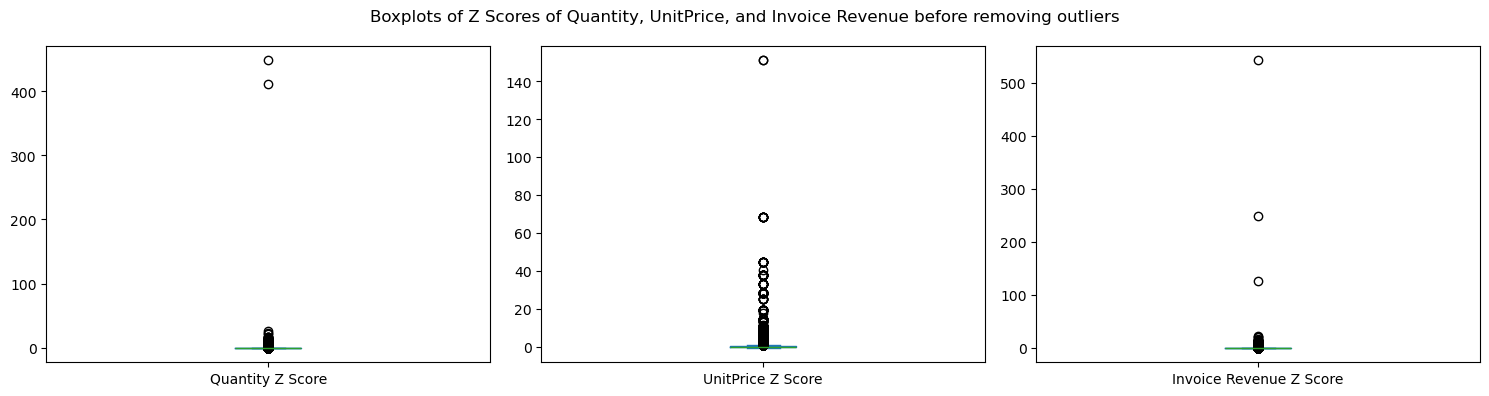

In [64]:
UCI_ret.loc[:,['Quantity Z Score','UnitPrice Z Score','Invoice Revenue Z Score']].plot(kind='box', subplots=True, sharey=False, figsize=(15, 4))
plt.suptitle('Boxplots of Z Scores of Quantity, UnitPrice, and Invoice Revenue before removing outliers')
plt.tight_layout()
plt.show()

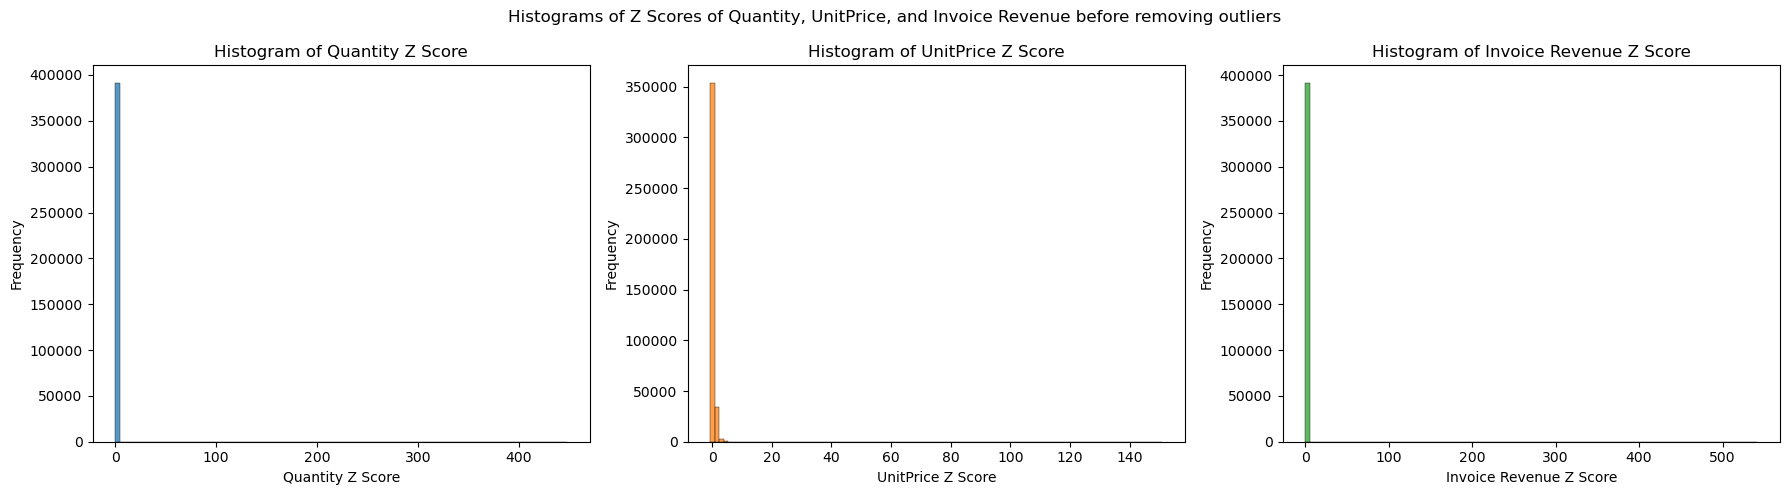

In [65]:
plt.figure(figsize=(18, 5))
color = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx,col in enumerate(['Quantity Z Score','UnitPrice Z Score','Invoice Revenue Z Score']):
    plt.subplot(1, 3, idx+1)
    sns.histplot(UCI_ret[col], bins=100, color=color[idx])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms of Z Scores of Quantity, UnitPrice, and Invoice Revenue before removing outliers')
plt.tight_layout()
plt.show()

Checking for outliers on the basis of Z scores

Number of Outliers in Quanity. We will remove points that are not in ± 2 $\sigma$. That means we will pick points approximately 95% of the points from the dataset.

In [66]:
UCI_ret[UCI_ret['Quantity Z Score'] > 2].shape, UCI_ret[UCI_ret['Quantity Z Score'] < -2].shape

((727, 17), (0, 17))

In [67]:
UCI_ret[UCI_ret['UnitPrice Z Score'] > 2].shape, UCI_ret[UCI_ret['UnitPrice Z Score'] < -2].shape

((8238, 17), (0, 17))

In [68]:
UCI_ret[UCI_ret['Invoice Revenue Z Score'] > 2].shape, UCI_ret[UCI_ret['Invoice Revenue Z Score'] < -2].shape

((574, 17), (0, 17))

We can see that 9539 values lie outside of ± 2 $\sigma$ confidence interval for Quantity. Similarly 8238 points were identified for Unit Price and 574 points for Invoice revenue. We will now proceed to remove these rows from our dataset.

In [69]:
outliers = (UCI_ret['Quantity Z Score'] > 2) | (UCI_ret['Quantity Z Score'] < -2) | (UCI_ret['UnitPrice Z Score'] > 2) | (UCI_ret['UnitPrice Z Score'] < -2) | (UCI_ret['Invoice Revenue Z Score'] > 2) | (UCI_ret['Invoice Revenue Z Score'] < -2)
UCI_cleaned = UCI_ret[~outliers]
UCI_outliers = UCI_ret[outliers]
UCI_cleaned.reset_index(drop=True, inplace=True)
UCI_outliers.reset_index(drop=True, inplace=True)

UCI_cleaned.shape, UCI_outliers.shape

((381890, 17), (9260, 17))

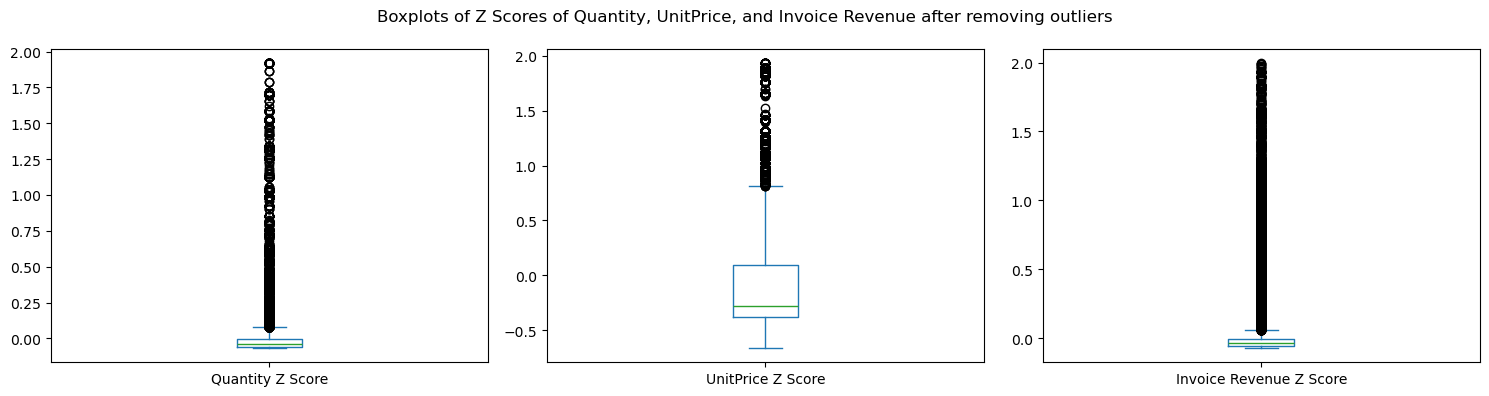

In [70]:
UCI_cleaned.loc[:,['Quantity Z Score','UnitPrice Z Score','Invoice Revenue Z Score']].plot(kind='box', subplots=True, sharey=False, figsize=(15, 4))
plt.suptitle('Boxplots of Z Scores of Quantity, UnitPrice, and Invoice Revenue after removing outliers')
plt.tight_layout()
plt.show()

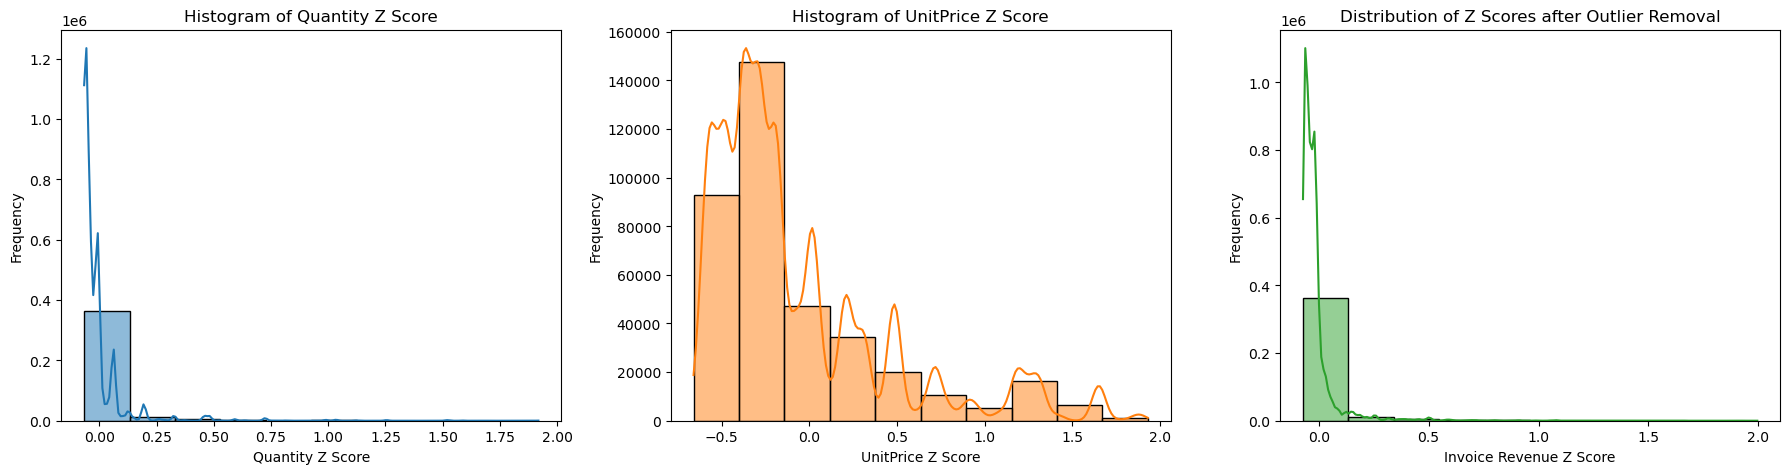

In [71]:
plt.figure(figsize=(18, 5))
color = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx,col in enumerate(['Quantity Z Score','UnitPrice Z Score','Invoice Revenue Z Score']):
    plt.subplot(1, 3, idx+1)
    sns.histplot(UCI_cleaned[col], kde=True, bins=10, color=color[idx])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.title('Distribution of Z Scores after Outlier Removal')
plt.tight_layout()
plt.show()

In [72]:
print("Total number of outliers removed: ", UCI_ret.shape[0] - UCI_cleaned.shape[0])
print("Mean Revenue before outlier removal: ", UCI_ret['Invoice Revenue'].mean())
print("Mean Revenue after outlier removal: ", UCI_cleaned['Invoice Revenue'].mean())

Total number of outliers removed:  9260
Mean Revenue before outlier removal:  22.33728145212834
Mean Revenue after outlier removal:  19.001883998009898


In [73]:
print("Median Revenue before outlier removal: ", UCI_ret['Invoice Revenue'].median())
print("Median Revenue after outlier removal: ", UCI_cleaned['Invoice Revenue'].median())

Median Revenue before outlier removal:  11.9
Median Revenue after outlier removal:  11.5


Plotting Revenue Distribution before and after removing outliers

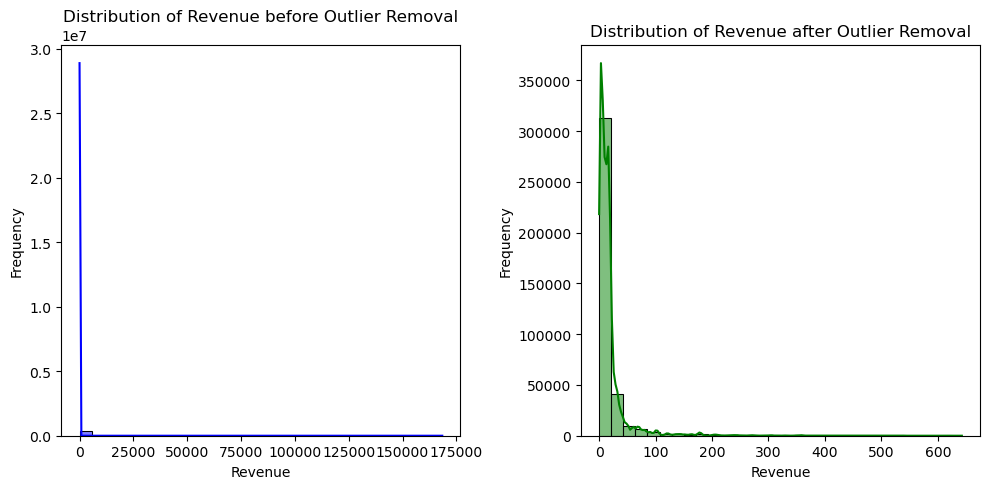

In [79]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(UCI_ret['Invoice Revenue'], kde=True, color='blue', bins=30)
plt.title('Distribution of Revenue before Outlier Removal')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(UCI_cleaned['Invoice Revenue'], kde=True, color='green', bins=30)
plt.title('Distribution of Revenue after Outlier Removal')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

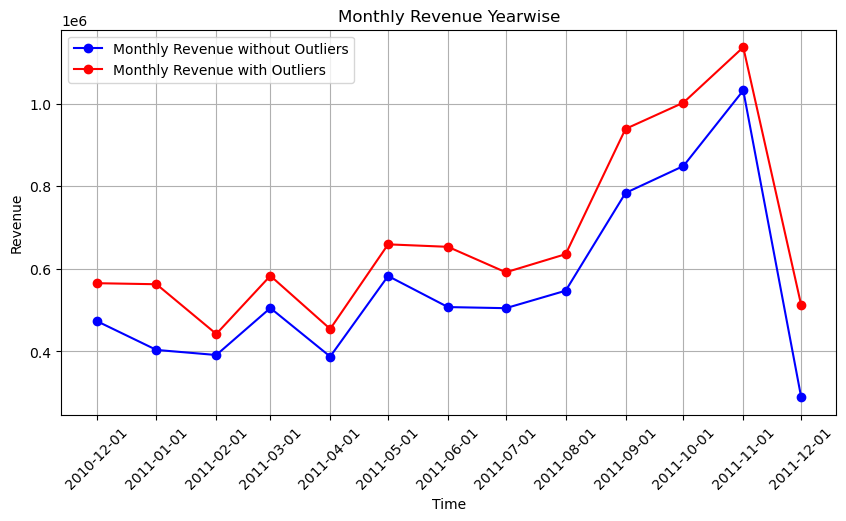

In [75]:
plt.figure(figsize=(10, 5))
monthly_revenue_yearwise = UCI_cleaned.groupby(['Year', 'Month'])['Invoice Revenue'].sum().reset_index()
monthly_revenue_yearwise['time'] = pd.to_datetime(monthly_revenue_yearwise[['Year', 'Month']].assign(Day=1))
monthly_revenue_yearwise = monthly_revenue_yearwise.sort_values(by='time')
plt.plot(monthly_revenue_yearwise['time'], monthly_revenue_yearwise['Invoice Revenue'], marker='o', color='blue', label='Monthly Revenue without Outliers')
monthly_revenue_yearwise_outliers = UCI_ret.groupby(['Year', 'Month'])['Invoice Revenue'].sum().reset_index()
monthly_revenue_yearwise_outliers['time'] = pd.to_datetime(monthly_revenue_yearwise_outliers[['Year', 'Month']].assign(Day=1))
monthly_revenue_yearwise_outliers = monthly_revenue_yearwise_outliers.sort_values(by='time')
plt.plot(monthly_revenue_yearwise_outliers['time'], monthly_revenue_yearwise_outliers['Invoice Revenue'], marker='o', color='red', label='Monthly Revenue with Outliers')
plt.title('Monthly Revenue Yearwise')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.xticks(monthly_revenue_yearwise['time'],rotation=45)
plt.grid()
plt.legend()
plt.show()

Outliers make the revenue look bloated.

In [80]:
UCI_outliers_monthly = UCI_outliers.groupby(['Year', 'Month'])['Invoice Revenue'].count().reset_index()
UCI_outliers_monthly['time'] = pd.to_datetime(UCI_outliers_monthly[['Year', 'Month']].assign(Day=1))
UCI_outliers_monthly

,Year,Month,Invoice Revenue,time
0,2010,12,552,2010-12-01
1,2011,1,524,2011-01-01
2,2011,2,500,2011-02-01
3,2011,3,671,2011-03-01
4,2011,4,630,2011-04-01
5,2011,5,808,2011-05-01
6,2011,6,766,2011-06-01
7,2011,7,601,2011-07-01
8,2011,8,615,2011-08-01
9,2011,9,829,2011-09-01


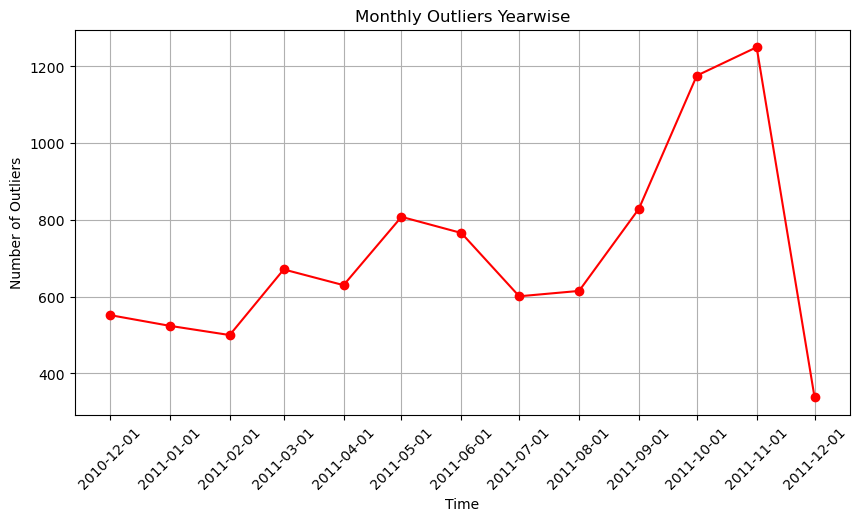

In [81]:
plt.figure(figsize=(10, 5))
plt.plot(UCI_outliers_monthly['time'], UCI_outliers_monthly['Invoice Revenue'], marker='o', color='red')
plt.title('Monthly Outliers Yearwise')
plt.xlabel('Time')
plt.ylabel('Number of Outliers')
plt.xticks(UCI_outliers_monthly['time'], rotation=45)
plt.grid()
plt.show()

We can see that most of the outliers are concentrated during the month of November and December of 2011. 

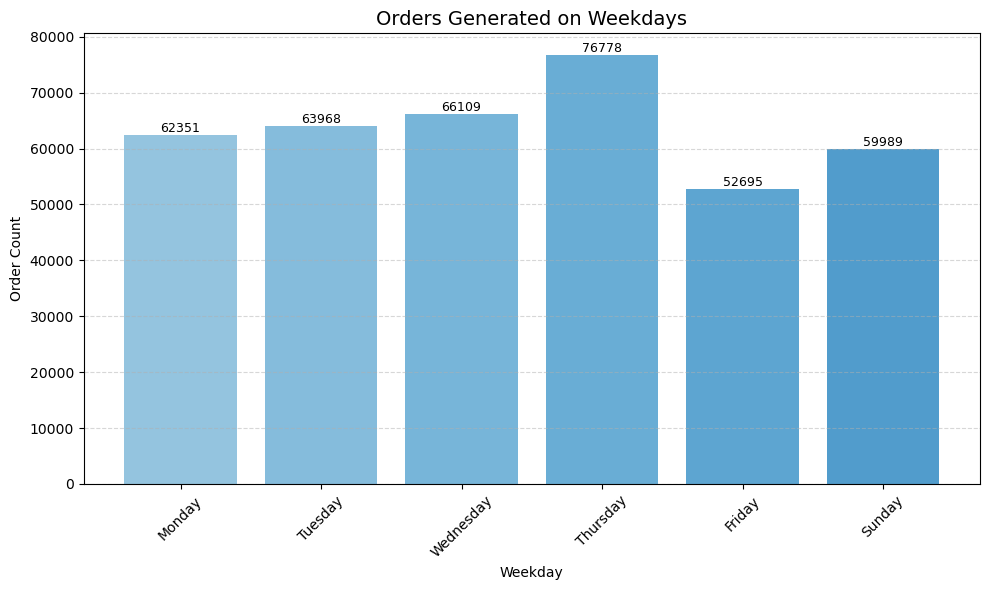

In [83]:
hourly_counts = UCI_cleaned['Hour'].value_counts().reset_index()
hourly_counts.columns = ['Hour', 'Order Count']
hourly_counts = hourly_counts.sort_values('Hour')

weekday_counts = UCI_cleaned['Weekday'].value_counts().reset_index()
weekday_counts.columns = ['Weekday', 'Order Count']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts['Weekday'] = pd.Categorical(weekday_counts['Weekday'], categories=weekday_order, ordered=True)
weekday_counts = weekday_counts.sort_values('Weekday')

plt.figure(figsize=(10, 6))
bars = plt.bar(weekday_counts['Weekday'], weekday_counts['Order Count'], color=plt.cm.Blues(np.linspace(0.4, 0.9, len(hourly_counts))))

plt.title('Orders Generated on Weekdays', fontsize=14)
plt.xlabel('Weekday')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

It seems like there is no sale happening during saturdays. This could be due to the fact that the dataset is from a retail store and they are closed on Saturdays.

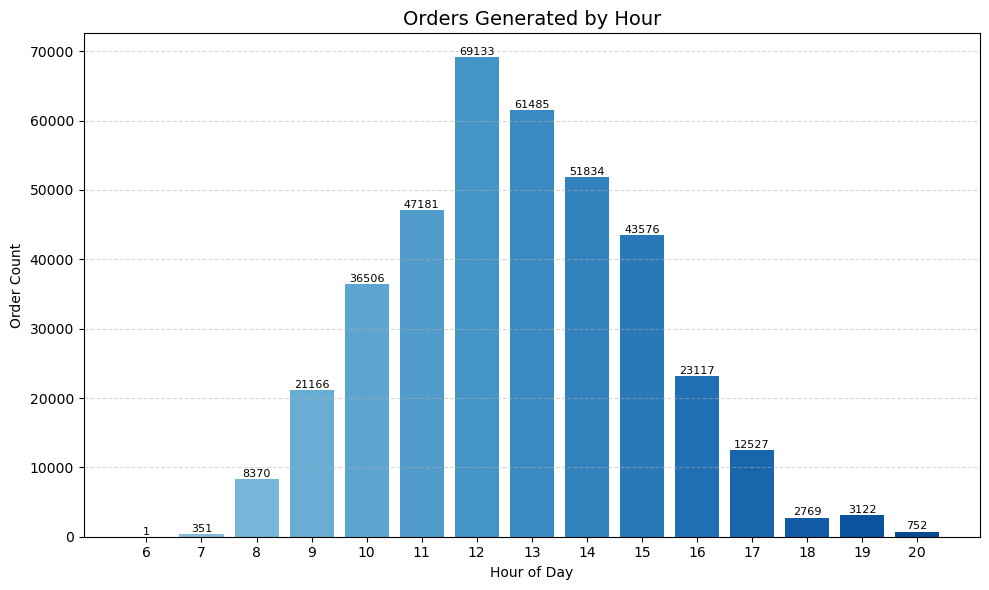

In [84]:
hourly_counts = UCI_cleaned['Hour'].value_counts().reset_index()
hourly_counts.columns = ['Hour', 'Order Count']
hourly_counts = hourly_counts.sort_values('Hour')

plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_counts['Hour'], hourly_counts['Order Count'], color=plt.cm.Blues(np.linspace(0.4, 0.9, len(hourly_counts))))

plt.title('Orders Generated by Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.xticks(hourly_counts['Hour']) 
plt.grid(axis='y', linestyle='--', alpha=0.5)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Sales are during the 12th and 13th hour of the day are highest. This could be due to the fact that people are shopping during their lunch breaks.

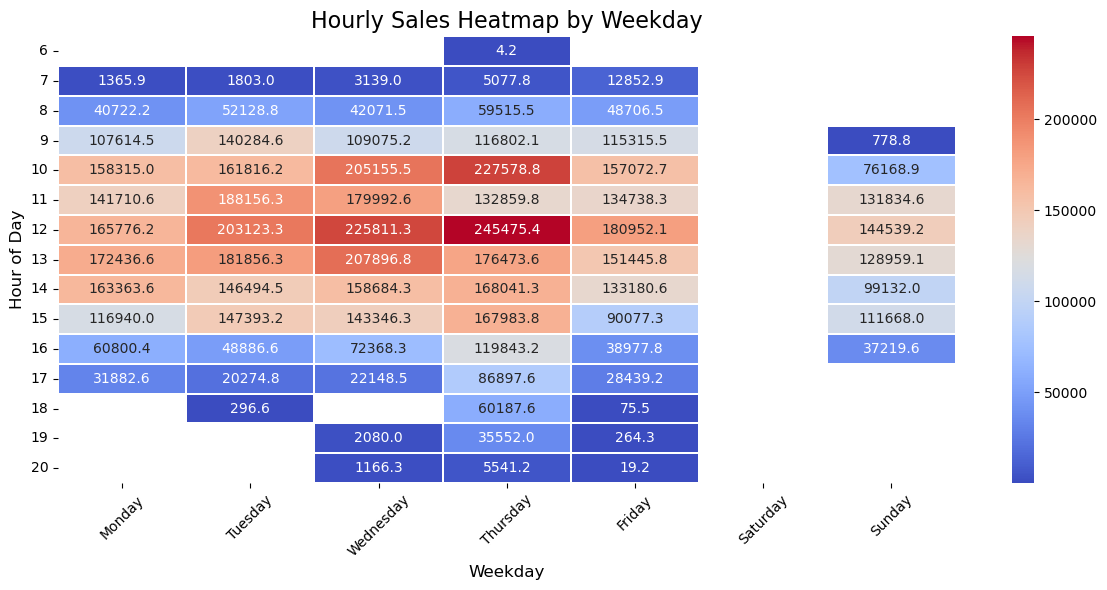

In [85]:
cleaned_data = UCI_cleaned.copy()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cleaned_data['Weekday'] = pd.Categorical(cleaned_data['Weekday'], categories=weekday_order, ordered=True)

pivot = cleaned_data.pivot_table(
    index='Hour',
    columns='Weekday',
    values='Invoice Revenue',
    aggfunc='sum'
)
pivot = pivot.replace(0, np.nan)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.1, linecolor='white')

plt.title('Hourly Sales Heatmap by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

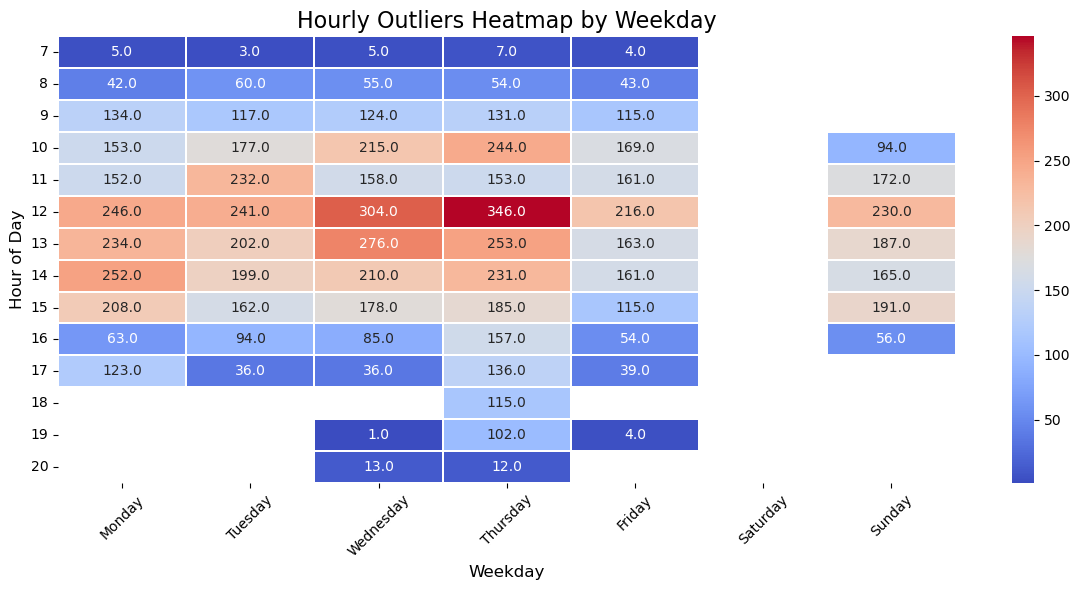

In [86]:
cleaned_data = UCI_outliers.copy()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cleaned_data['Weekday'] = pd.Categorical(cleaned_data['Weekday'], categories=weekday_order, ordered=True)

pivot = cleaned_data.pivot_table(
    index='Hour',
    columns='Weekday',
    values='Invoice Revenue',
    aggfunc='count'
)
pivot = pivot.replace(0, np.nan)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.1, linecolor='white')

plt.title('Hourly Outliers Heatmap by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [87]:
country_sales = UCI_cleaned.groupby('Country')['Invoice Revenue'].sum().reset_index()

# Sorting countries by total sales
top_countries = country_sales.sort_values(by='Invoice Revenue', ascending=False).head(10)

fig = px.pie(
    top_countries,
    names='Country',
    values='Invoice Revenue',
    title='Top 10 Countries by Total Sales',
    color_discrete_sequence=px.colors.sequential.ice_r,
)

fig.update_traces(
    textinfo='label+percent',
    textfont_size=16,
    marker=dict(line=dict(color='white', width=2))
)

fig.update_layout(
    title_font_size=24,
    height=920,
    width=900
)

fig.show()  

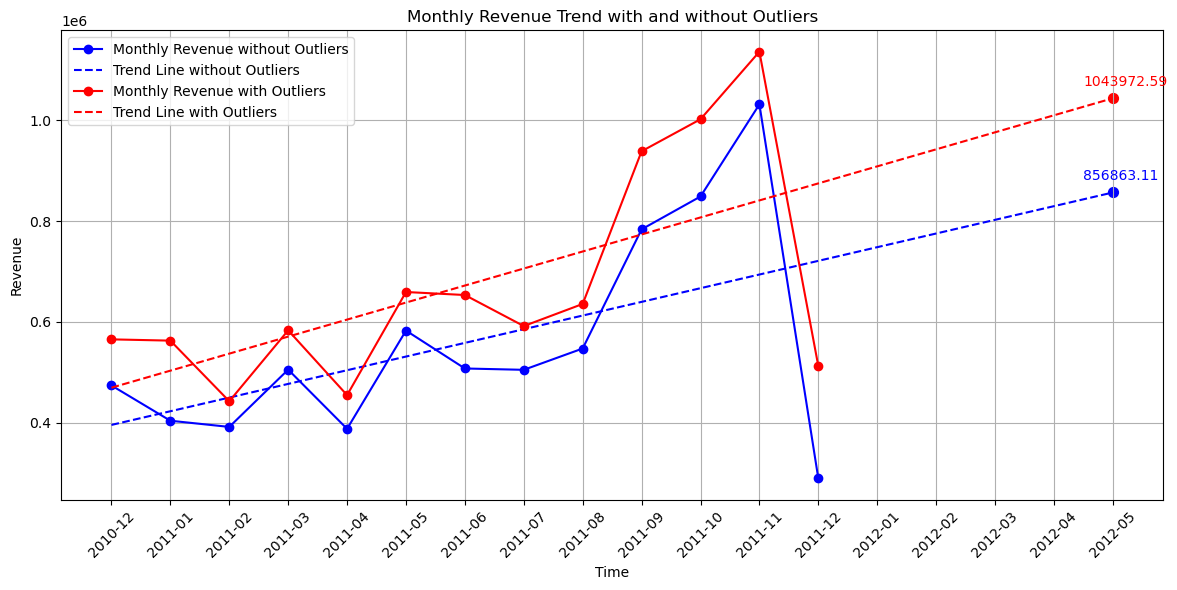

In [90]:
monthly_trend_cleaned = UCI_cleaned.groupby(['Year','Month'])['Invoice Revenue'].sum().reset_index()
monthly_trend_with_outliers = UCI_ret.groupby(['Year','Month'])['Invoice Revenue'].sum().reset_index()

# Revenue Modeling with Cleaned data
lrc = LinearRegression()
X = monthly_trend_cleaned.index.values.reshape(-1, 1)
y = monthly_trend_cleaned['Invoice Revenue'].values
lrc.fit(X, y)
clean_prediction = lrc.predict(np.arange(18).reshape(-1, 1))
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend_cleaned['Invoice Revenue'], marker='o', color='blue', label='Monthly Revenue without Outliers')
plt.plot(clean_prediction, color='blue', linestyle='--', label='Trend Line without Outliers')
plt.text(16.5, clean_prediction[-1]+25000, f'{clean_prediction[-1]:.2f}', fontsize=10, color='blue')
plt.scatter(17, clean_prediction[-1], color='blue', marker='o', s=50)

# Revenue Modeling with Outliers data
lro = LinearRegression()
X = monthly_trend_with_outliers.index.values.reshape(-1, 1)
y = monthly_trend_with_outliers['Invoice Revenue'].values
lro.fit(X, y)
outlier_prediction = lro.predict(np.arange(18).reshape(-1, 1))
plt.plot(monthly_trend_with_outliers['Invoice Revenue'], marker='o', color='red', label='Monthly Revenue with Outliers')
plt.plot(outlier_prediction, color='red', linestyle='--', label='Trend Line with Outliers')
plt.text(16.5, outlier_prediction[-1]+25000, f'{outlier_prediction[-1]:.2f}', fontsize=10, color='red')
plt.scatter(17, outlier_prediction[-1], color='red', marker='o', s=50)


plt.title('Monthly Revenue Trend with and without Outliers')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.xticks(np.arange(0, 18),pd.date_range(start='2010-12-01', periods=18, freq='M').strftime('%Y-%m'), rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

If we had predicted using the outliers we would have predicted some bloated values.

#### How do we handle outliers?

Detect outliers using statistical or ML techniques:

* IQR (Interquartile Range): Values below Q1 – 1.5×IQR or above Q3 + 1.5×IQR

* Z-Score: |z| > 2 (or 3) indicates outlier

* Isolation Forest / DBSCAN: ML-based outlier detection

* Rolling Statistics: Sudden spikes/drops in rolling mean or std


#### Forecasting with outliers
Removing outliers can help in better prediction of the data.|


### RFM Analysis

In [92]:
UCI_cleaned

,InvoiceNo,StockCode,InvoiceDate,Year,Month,Day,Weekday,Hour,CustomerID,Country,Description,Quantity,UnitPrice,Invoice Revenue,UnitPrice Z Score,Invoice Revenue Z Score,Quantity Z Score
0,536365,85123A,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white hanging heart tlight holder,6,2.55,15.30,-0.075704,-0.022633,-0.039519
1,536365,71053,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,white metal lantern,6,3.39,20.34,0.120341,-0.006424,-0.039519
2,536365,84406B,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,cream cupid hearts coat hanger,8,2.75,22.00,-0.029027,-0.001085,-0.028457
3,536365,84029G,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,knitted union flag hot water bottle,6,3.39,20.34,0.120341,-0.006424,-0.039519
4,536365,84029E,2010-12-01 08:26:00,2010,12,1,Wednesday,8,17850.0,United Kingdom,red woolly hottie white heart,6,3.39,20.34,0.120341,-0.006424,-0.039519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381885,581587,22613,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,pack of 20 spaceboy napkins,12,0.85,10.20,-0.472461,-0.039035,-0.006334
381886,581587,22899,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens apron dolly girl,6,2.10,12.60,-0.180728,-0.031316,-0.039519
381887,581587,23254,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery dolly girl,4,4.15,16.60,0.297714,-0.018452,-0.050580
381888,581587,23255,2011-12-09 12:50:00,2011,12,9,Friday,12,12680.0,France,childrens cutlery circus parade,4,4.15,16.60,0.297714,-0.018452,-0.050580


Calculating the frequency of customers and their recency.

In [177]:
UCI_recent = UCI_cleaned.groupby(by='CustomerID', as_index=False) \
    .agg(
        Frequency=('Invoice Revenue', 'nunique'),
        LastInvoiceDate=('InvoiceDate', 'max'),
        TotalValue=('Invoice Revenue', 'sum'),
    )

max_invoice_date = UCI_cleaned['InvoiceDate'].max()
UCI_recent['Recency'] = (max_invoice_date - UCI_recent['LastInvoiceDate']).dt.days
UCI_recent

,CustomerID,Frequency,LastInvoiceDate,TotalValue,Recency
0,12347.0,54,2011-12-07 15:52:00,4118.75,1
1,12348.0,14,2011-09-25 13:13:00,1437.24,74
2,12349.0,39,2011-11-21 09:51:00,1328.55,18
3,12350.0,8,2011-02-02 16:01:00,294.40,309
4,12352.0,28,2011-11-03 14:37:00,1321.99,35
...,...,...,...,...,...
4299,18280.0,8,2011-03-07 09:52:00,180.60,277
4300,18281.0,3,2011-06-12 10:53:00,46.92,180
4301,18282.0,8,2011-12-02 11:43:00,127.05,7
4302,18283.0,75,2011-12-06 12:02:00,2023.63,3


In [178]:
UCI_recent.describe()

,CustomerID,Frequency,LastInvoiceDate,TotalValue,Recency
count,4304.000000,4304.000000,4304,4304.000000,4304.000000
mean,15295.368727,31.736059,2011-09-08 13:48:03.791821568,1686.019861,91.445632
min,12347.000000,1.000000,2010-12-01 09:53:00,2.900000,0.000000
25%,13811.750000,11.000000,2011-07-21 11:41:00,282.967500,17.000000
50%,15289.500000,22.000000,2011-10-20 10:52:00,623.365000,50.000000
75%,16775.250000,42.000000,2011-11-22 11:02:30,1531.765000,141.000000
max,18287.000000,378.000000,2011-12-09 12:50:00,246346.360000,373.000000
std,1720.401222,32.011248,NaN,6021.737830,100.054792


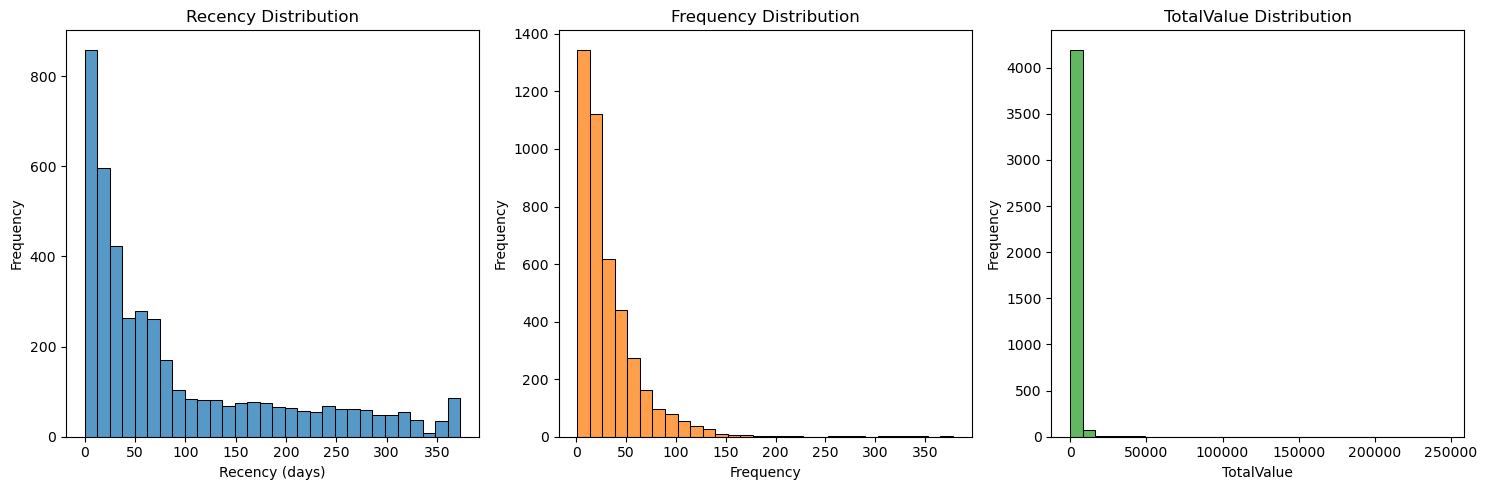

In [179]:
# Visualizing the distribution of Recency, Frequency, and TotalValue
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(UCI_recent['Recency'], bins=30, color='C0')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.histplot(UCI_recent['Frequency'], bins=30, color='C1')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
sns.histplot(UCI_recent['TotalValue'], bins=30, color='C2')
plt.title('TotalValue Distribution')
plt.xlabel('TotalValue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


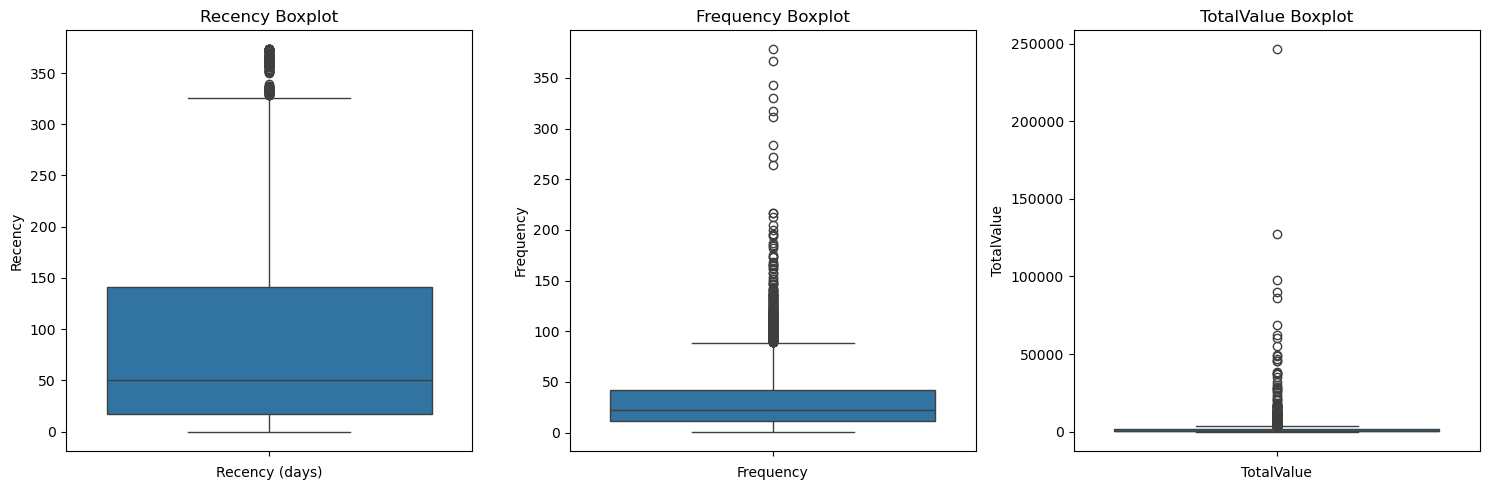

In [180]:
# Creating a boxplot for Recency, Frequency, and TotalValue
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=UCI_recent['Recency'])
plt.title('Recency Boxplot')
plt.xlabel('Recency (days)')
plt.subplot(1, 3, 2)
sns.boxplot(y=UCI_recent['Frequency'])
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')
plt.subplot(1, 3, 3)
sns.boxplot(y=UCI_recent['TotalValue'])
plt.title('TotalValue Boxplot')
plt.xlabel('TotalValue')
plt.tight_layout()
plt.show()

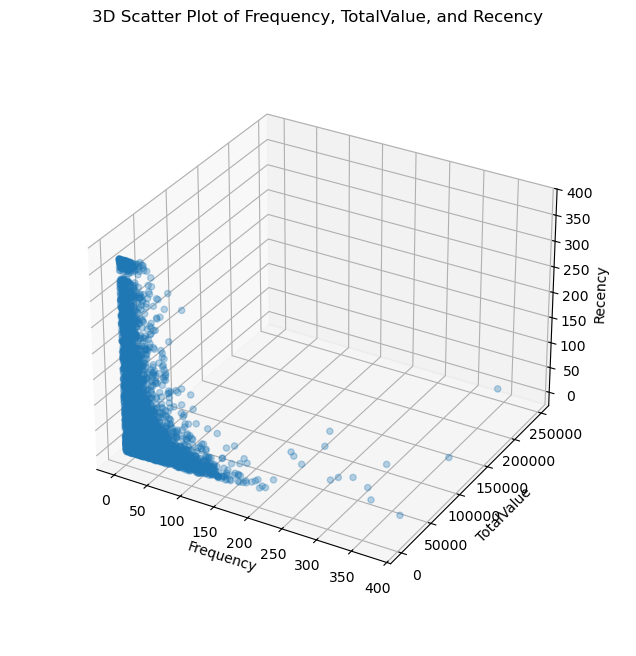

In [181]:
# Creating a 3D scatter plot of Frequency, TotalValue, and Recency
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=UCI_recent['Frequency'], ys =UCI_recent['TotalValue'], zs=UCI_recent['Recency'], c='C0', marker='o', alpha=0.3)
ax.set_xlabel('Frequency')
ax.set_ylabel('TotalValue')
ax.set_zlabel('Recency')
plt.title('3D Scatter Plot of Frequency, TotalValue, and Recency')
ax.set_box_aspect(None, zoom=0.85)
# ax.view_init(elev=30, azim=-30)
plt.show()

In [182]:
# Applying Standardization and Normalization to our non-outlier dataset since it is not Gaussian in nature
scaler = StandardScaler()
scaled_data = scaler.fit_transform(UCI_recent.iloc[:,[1,3,4]])

normalized_data = normalize(scaled_data)
retail_data_normalized = pd.DataFrame(normalized_data, index=UCI_recent.index,
                                 columns=['Frequency', 'TotalValue', 'Recency'])
retail_data_normalized

,Frequency,TotalValue,Recency
0,0.574800,0.333879,-0.747080
1,-0.951477,-0.070948,-0.299428
2,0.294463,-0.077033,-0.952553
3,-0.321145,-0.100091,0.941726
4,-0.201484,-0.104362,-0.973916
...,...,...,...
4299,-0.368378,-0.124201,0.921342
4300,-0.696056,-0.211059,0.686265
4301,-0.643158,-0.224557,-0.732067
4302,0.836385,0.034696,-0.547043


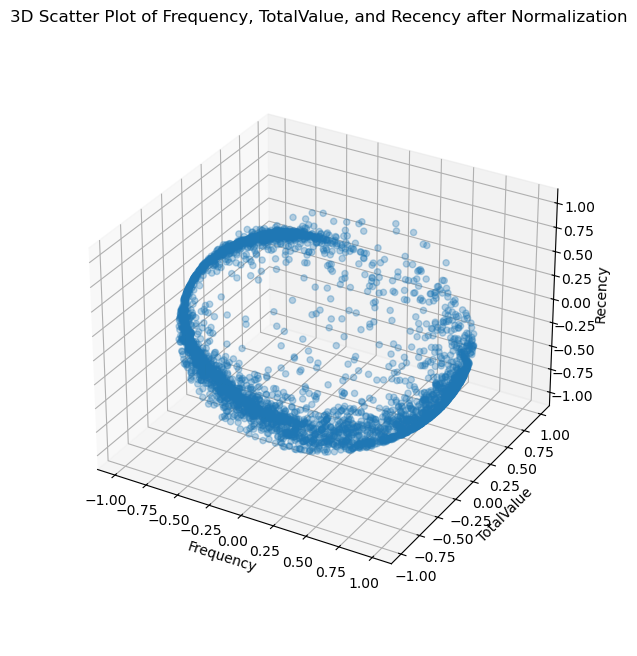

In [183]:
# Creating a 3D scatter plot of Frequency, TotalValue, and Recency after normalization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=retail_data_normalized['Frequency'], ys =retail_data_normalized['TotalValue'], zs=retail_data_normalized['Recency'], c='C0', marker='o', alpha=0.3)
ax.set_xlabel('Frequency')
ax.set_ylabel('TotalValue')
ax.set_zlabel('Recency')
plt.title('3D Scatter Plot of Frequency, TotalValue, and Recency after Normalization')
ax.set_box_aspect(None, zoom=0.85)
plt.show()


### K means Clustering

In [184]:
max_clusters = 20
max_iters = 1000

inertia_values = {}
silhouette_values = {}

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, max_iter=max_iters, random_state=42, n_init='auto', verbose=0)
    clusters = kmeans.fit_predict(retail_data_normalized)
    inertia_values[i] = kmeans.inertia_
    silhouette_values[i] = silhouette_score(retail_data_normalized, clusters)
    print(f"Clusters: {i}, Inertia: {inertia_values[i]}, Silhouette Score: {silhouette_values[i]}")

Clusters: 2, Inertia: 2019.8165416857084, Silhouette Score: 0.4935808590264609
Clusters: 3, Inertia: 891.2005198550715, Silhouette Score: 0.5744279576213692
Clusters: 4, Inertia: 652.3154318335173, Silhouette Score: 0.5178768577310978
Clusters: 5, Inertia: 529.0237133804536, Silhouette Score: 0.4878480576226055
Clusters: 6, Inertia: 453.8114118633691, Silhouette Score: 0.4731998938651206
Clusters: 7, Inertia: 390.83568612950467, Silhouette Score: 0.4631721433219542
Clusters: 8, Inertia: 349.3967061487477, Silhouette Score: 0.42489858700477656
Clusters: 9, Inertia: 285.1564880417596, Silhouette Score: 0.4437658678320621
Clusters: 10, Inertia: 259.1621263349989, Silhouette Score: 0.42152288467279003
Clusters: 11, Inertia: 236.4762232088262, Silhouette Score: 0.4230933357790264
Clusters: 12, Inertia: 219.63476302341329, Silhouette Score: 0.42659690553256946
Clusters: 13, Inertia: 203.22532868059892, Silhouette Score: 0.4025798669382374
Clusters: 14, Inertia: 185.39487798827506, Silhouette

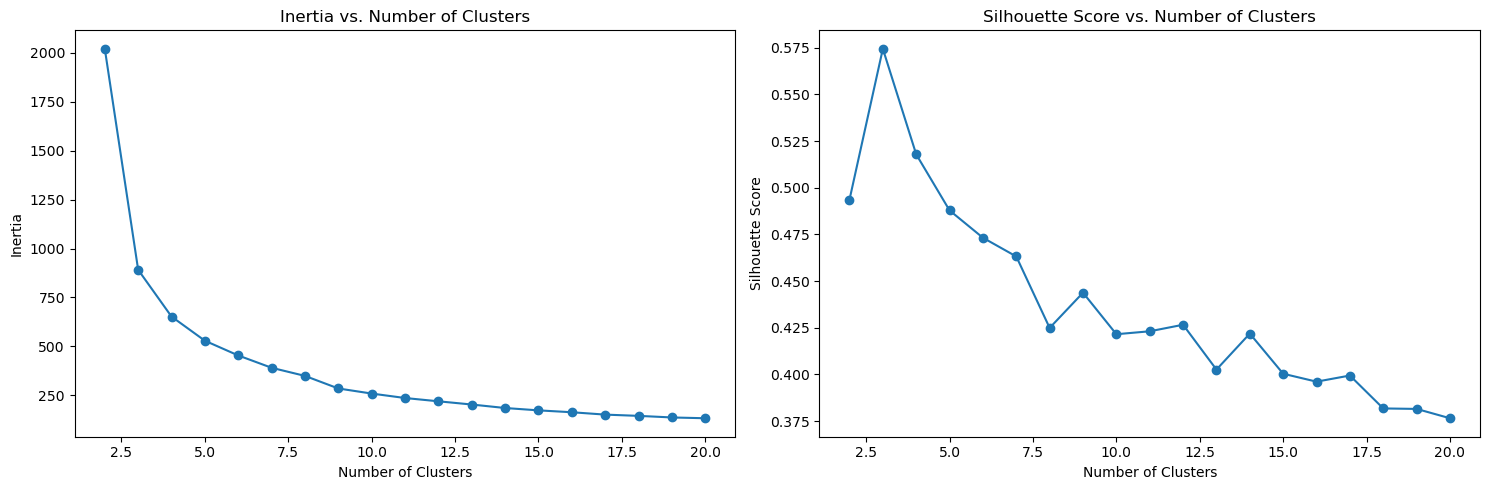

In [185]:
# Plotting inertia and silhouette scores. Exploring the elbow method.
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.subplot(1, 2, 2)
plt.plot(list(silhouette_values.keys()), list(silhouette_values.values()), marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


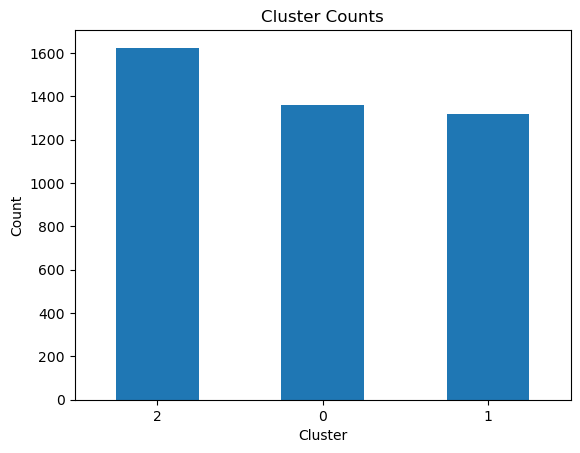

In [186]:
# Creating the KMeans model with the optimal number of clusters

Optimal_Clusters = 3
kmeans = KMeans(n_clusters=Optimal_Clusters, max_iter=max_iters, random_state=42, n_init='auto', verbose=0)
clusters = kmeans.fit_predict(retail_data_normalized)
retail_data_normalized['Cluster'] = clusters
retail_data_normalized['Cluster'] = retail_data_normalized['Cluster'].astype('category')
retail_data_normalized['Cluster'].value_counts()
retail_data_normalized['Cluster'].value_counts().plot(kind='bar', color='C0')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [188]:
cluster_labels

Index([0, 1, 2], dtype='int32')

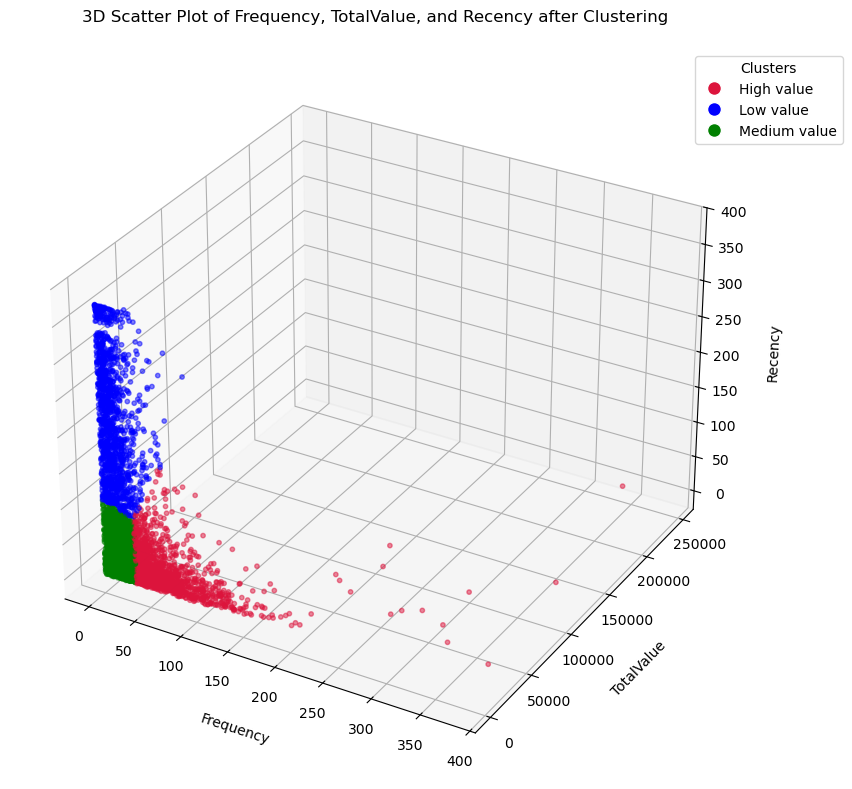

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


custom_colors = ['crimson', 'blue', 'green']  

cluster_codes = retail_data_normalized['Cluster'].cat.codes
cluster_labels = ["High value", "Low value", "Medium value"]


point_colors = [custom_colors[i] for i in cluster_codes]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=UCI_recent['Frequency'],
    ys=UCI_recent['TotalValue'],
    zs=UCI_recent['Recency'],
    c=point_colors,
    marker='o',
    alpha=0.5,
    s=10
)

ax.set_xlabel('Frequency', labelpad=12)
ax.set_ylabel('TotalValue', labelpad=12)
ax.set_zlabel('Recency', labelpad=12)
plt.title('3D Scatter Plot of Frequency, TotalValue, and Recency after Clustering', pad=20)



handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=custom_colors[i],
                      label=str(label), markersize=10)
           for i, label in enumerate(cluster_labels)]
ax.legend(handles=handles, title='Clusters', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

Here after clustering we can identify:

Cluster 1 : High Value Customers(Red) 
* Observation - To retain. These are the customers who have high frequency and recency. They are the most valuable customers for the company.
* How - Create loyalty programs, discounts, and offers for these customers.

Cluster 2 : Medium Value Customers.(Green) 
* Observation - Re engage. The customers with Lower value, infrequent customers who have bought reletively recently.
* How - Send pamphlets, text messages, and emails to these customers to re-engage them.

Cluster 3 : Low Value Customers.(Blue) 
* Observation - Can try to re engage with lesser expectations. Low to Moderate value, infrequent customers who have not bought from us reletively recently,people who have left touch with our business.
* How - Email marketing, special discounts, and targeted marketing campagains.

